# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.054315e+01     6.522139e+00
 * time: 0.07164502143859863
     1     2.830417e+01     4.779865e+00
 * time: 0.08181095123291016
     2     1.870634e+01     3.658934e+00
 * time: 0.09429383277893066
     3     1.204242e+01     2.454332e+00
 * time: 0.10664892196655273
     4     1.127519e+01     2.807991e+00
 * time: 0.11666393280029297
     5     1.034830e+01     2.150187e+00
 * time: 0.12659597396850586
     6     9.462372e+00     1.340188e+00
 * time: 0.13662004470825195
     7     8.740541e+00     1.095852e+00
 * time: 0.14655303955078125
     8     8.246330e+00     9.084530e-01
 * time: 0.15659189224243164
     9     8.031762e+00     4.553255e-01
 * time: 0.16658401489257812
    10     7.956655e+00     3.762129e-01
 * time: 0.17664599418640137
    11     7.926443e+00     1.987102e-01
 * time: 0.1867380142211914
    12     7.905456e+00     3.197158e-01
 * time: 0.1945939064025879
    13     7.882626e+00     1.869860e-01
 * time: 0

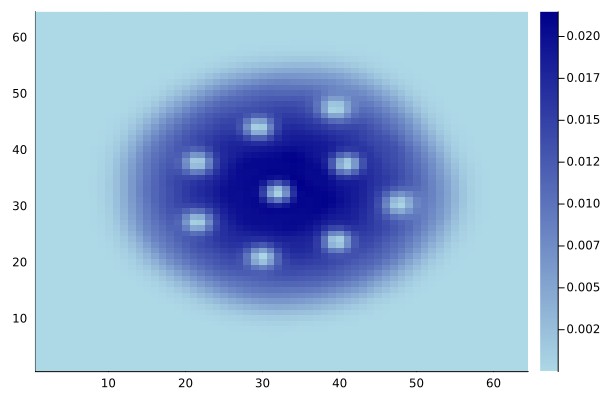

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)